## Data Cleaning

In [1]:
import pandas as pd
import re
import unicodedata
import html

In [2]:
pp = pd.read_csv("Top100_Free_01-20.csv")

In [7]:
pp.head(5)

,Name,Age_rating,Seller,Price,Category,Privacy_policy,text
0,Temu: Shop Like a Billionaire,4+,Temu,Free,Shopping,https://www.temu.com/privacy-and-cookie-policy...,Temu | Privacy Policy\n​​​​​​​​​​​​​​​​​​​​​​​...
1,"Threads, an Instagram app",12+,"Instagram, Inc.",Free,Social Networking,https://privacycenter.instagram.com/policy,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
2,TikTok,12+,TikTok Ltd.,Free,Entertainment,https://www.tiktok.com/legal/privacy-policy,Privacy Policy | TikTok\nU.S.\nPrivacy Policy\...
3,CapCut - Video Editor,12+,Bytedance Pte. Ltd,Free,Photo & Video,https://www.capcut.net/clause/privacy?language=en,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
4,"YouTube: Watch, Listen, Stream",12+,Google LLC,Free,Photo & Video,http://www.google.com/policies/privacy,\n\n\n\n\n\nhttps://policies.google.com/privac...


* Duolingo is not parsed. It has 406 "Not Acceptable" code.

* Copied and pasted the html text

In [33]:
pp[pp['text'].isna()]

,Name,Age_rating,Seller,Price,Category,Privacy_policy,text,cleaned_text
35,Duolingo - Language Lessons,4+,Duolingo,Free,Education,https://www.duolingo.com/privacy,NaN,


In [38]:
duo = """Duolingo
Privacy Policy
Please note that the Privacy Policy was last revised on March 4, 2024

General
At Duolingo, we care about your personal information, so we have prepared this Privacy Policy to explain how we collect, use, and share it. This Privacy Policy applies to Duolingo websites, mobile apps, and related services (“Service”). By using the Service, you agree with Duolingo’s collection, use, and sharing of your personal information in accordance with the terms of this Privacy Policy.

Certain Duolingo services are subject to additional or different terms. For example, when you register for or take the Duolingo English Test, you are also subject to the Supplemental Privacy Terms for the Duolingo English Test.

Please note that Duolingo is constantly testing and improving our product features. Any features discussed in this Privacy Policy may not be available to all users or in all jurisdictions.

Information We Collect
When you use the Service, Duolingo may collect the following personal information about you.

a. Account Registration
To register for a Duolingo account, you may provide us with your age and email address. In some countries, you may also provide us with your phone number.

You may also register for a Duolingo account using certain social logins, such as Google and Facebook. If you register for Duolingo using a social login, Duolingo may receive information about you from your social login provider, including your email address and contacts.

You can manage your Duolingo account and social logins from your Settings.

b. Profile Page & User-Generated Content
After you register for your Duolingo account, a profile page will be created for you (“Profile”). Your Profile will be populated by information you submit, such as your name, username, bio, and profile picture (“User-Generated Content”). Your age, phone number, and email address are not included in your public Profile and are not considered User-Generated Content under this Privacy Policy. Other Duolingo users may be able to search for your Profile using your name, username, email address, or phone number.

Your Profile will also include information about your learning progress, such as the languages you are learning, your learning statistics, and your achievements. Moreover, your Profile will show a list of your followers and other users you follow.

By default, your Profile is public, and visible to other Duolingo users and anyone else on the Internet. In addition, your User-Generated Content may be publicly visible. If your Profile is public, third-party websites or web scrapers may be able to read, collect, and use your public information for their own purposes. However, you can set your Profile to private in your Settings.

You may be able to submit comments that will supplement other users’ Profiles and other users may be able to submit comments that will supplement your Profile. Any comments you submit are considered User-Generated Content under this Privacy Policy. You can delete comments you submit or comments that other users submit to your Profile.

Duolingo may scan or review any User-Generated Content, or share your User-Generated Content with a third-party content moderation service provider, to ensure compliance with our Community Guidelines. Duolingo may restrict or delete User-Generated Content if it violates our Community Guidelines or for any other reason.

c. Duolingo Max
If you subscribe to Duolingo Max, you may interact with Artificial Intelligence (“AI”) features, including Explain My Answer, which provides you with AI-powered feedback on your answers, and Roleplay, which allows you to send text or audio messages to an AI chat companion in an open-ended conversational format.

When you interact with AI features, your information may be shared with AI vendors such as OpenAI, which may keep a copy of your text or audio responses for their own purposes. Please do not submit any personal or confidential information when using AI features.

d. Speaking Challenges
Some lessons involve you speaking into the Duolingo app. To recognize speech, your audio may be sent to a third-party provider such as Google, Apple, or Amazon Web Services. You may disable speaking challenges in your Settings or skip speaking challenges in your lesson.

Duolingo may also collect and analyze your speech to help us understand the effectiveness of our lessons and to improve the product. You may choose not to share your audio with us for product improvement purposes in your Settings. Any audio you agree to send to Duolingo is anonymized when it reaches our servers to ensure that no trace of your personal information remains attached to the audio.

e. Contact Sync Feature
Duolingo has a Contact Sync feature, which allows you to find your contacts who also use Duolingo. If you use Contact Sync, you will give the Duolingo app permission to access the contacts stored on your phone for the purpose of identifying your contacts who also use Duolingo. If Duolingo identifies a user with the same phone number as someone in your contacts, we will recommend that user as someone you may wish to follow.

If you use the Contact Sync feature, Duolingo will not store your contacts’ phone numbers, but only an encrypted “hash” of them. This hash is an alternative code to the actual phone number and can be used only to uniquely identify the number. The hashing process securely strips away the real phone number, so Duolingo cannot use the hashes to identify your contacts’ real phone number, contact your contacts, or share their information with anyone else. This hashing process applies only to your contacts’ phone numbers and not yours.

If you have submitted your phone number to Duolingo, whether through Contact Sync or some other way (such as adding the phone number to your profile, using it to register, or using it to activate other product features), other Duolingo users who have your phone number in their contacts may be able to locate your Profile using Contact Sync.

f. Activity Data
When you use the Service, we may generate data about your use of the Service, which may include your browser and device data, log data, and IP address. We will also generate data regarding your engagement in educational activities on the Service.

g. FullStory
When you use Duolingo in our app or on our website, some of your activity will be logged by a service called FullStory. FullStory captures and analyzes your activity and provides us with data and a video session replay of your activity to help us make the Duolingo experience better. FullStory does not record usernames, names, profile images, email addresses, profile locations or bios, or passwords. However, FullStory records usage patterns (e.g., clicks, mouse movements, scrolling, and typing), tech specs (e.g., browser, device type, operating system, viewfinder size, script errors, and IP address), navigation (e.g., pages visited, referrers, URL parameters, and session duration), and learning activity (e.g., session progress and answers). You can disable FullStory activity recording by using the opt-out function on FullStory’s website. FullStory is disabled for known Child Users.

h. Cookies
When you access the Duolingo website, we store certain data from your browser using cookies. A cookie is a piece of data stored on the user’s computer tied to data about the user. We use session ID cookies to confirm that users are logged in. If you do not want your data to be collected by cookies, there is a simple procedure in most browsers that allows you to deny or accept the cookie feature. However, cookies may be necessary to provide you with certain features available on the website (e.g., customized information). You can find more information about cookies and how to manage them here.

You can see a list of all cookies used at Duolingo on our Cookie List page and manage your cookies in the Privacy Preference Center. Please note that our cookies include Targeting Cookies from Google, Facebook, Amazon, and other companies, which these companies may use to track your activities across multiple websites to deliver personalized advertising to you.

i. Google Analytics
We use Google Analytics, which is a web analytics tool that helps us understand how users engage with our website. Like many services, Google Analytics uses first-party cookies to track user interactions, as in our case, where they are used to collect information about how users use our site. This information is used to compile reports and to help us improve our site. These reports disclose website trends without identifying individual visitors. You can opt out of Google Analytics by installing Google’s browser add-on available here.

How We Process Your Information
Duolingo may process your personal information according to the following legal bases: to provide products or services you request, to promote Duolingo’s legitimate interests, to comply with legal obligations, and with your consent. In particular, Duolingo may process and share your personal information in the following ways:

a. Providing and improving the Service
Duolingo will process your personal information to provide and improve the Service. For example, we will use the information you provide to maintain your Profile and learning progress, display your Profile to other users (unless you make it private), personalize learning content, detect and fix bugs, perform research, and provide customer service to you.

Duolingo may share personal information with third parties that help us provide or improve the Service, including hosting providers such as Amazon Web Services, search engine providers such as Google, analytics providers such as Crashlytics, support providers such as ZenDesk, and payment processors such as Stripe. Duolingo may also share your information with third-party vendors that support product features such as AI, speech recognition, and content moderation.

If you redeem a promotion code to gain a Duolingo subscription, we may share data regarding your usage of Duolingo with the organization that provided the promotion code to you.

b. Communicating with you
Duolingo will use the email address or phone number you provide to send you the following types of messages:

Essential messages to support the operation of the Service.
Messages to support the Duolingo teaching methodology and reinforce your learning, such as learning tips, reminders to practice, and progress reports.
Notifications about friend requests and your friends’ progress on Duolingo.
Announcements regarding changes to the Service or products.
Announcements of new Duolingo products, services, offers, or research opportunities.
You may opt-out of receiving non-essential messages in your Settings.

c. Complying with law and preventing harmful activities
Duolingo may process and share personal information if necessary to comply with legal requests, such as subpoenas or court orders. Duolingo may share personal information when we believe it is necessary to comply with law, to protect our interests or property, to prevent fraud or other illegal activity, to assist law enforcement, or to prevent imminent harm. This may include sharing information with other companies, lawyers, agents, or government agencies.

d. Personalized advertising
Duolingo may process and share your personal information for the purpose of providing you with personalized advertising. To provide personalized advertising, we work with a variety of third-party advertising networks, marketing analytics service providers, and website analysis firms, such as Google, Facebook, Oath, and Unity. These third-party advertising service providers collect and use personal information about your visits to and use of the Service, as well as other websites, in order to serve you with advertisements and content tailored to meet your preferences and likely interests, and better understand ad effectiveness. Aggregate demographic and interest data will also be used for market research purposes.

You can opt out of receiving personalized advertising in your Settings. You may also be able to opt out of receiving personalized ads from advertisers and ad networks that are members of the Network Advertising Initiative or who follow the DAA Self-Regulatory Principles for Online Behavioral Advertising using their respective opt-out tools hyperlinked above. In addition, your mobile devices may offer settings that let you make choices about the collection, use, and transfer of mobile app information for personalized ads (for example, Apple iOS’ Advertising ID and Google Android’s Advertising ID). Users in certain jurisdictions (including the European Union and United Kingdom) are opted out of personalized advertising by default, but may opt in.

Please note that opting out of personalized advertising does not prevent the display of all advertisements to you. Certain Duolingo subscriptions may offer an ad-free experience.

e. Anonymous information
Duolingo may process aggregated, de-identified, or otherwise anonymous or anonymized information for any purpose. Such information is not considered personal information.

Your Data Subject Rights
You also have the following rights in relation to the personal information we hold about you, in addition to any other rights required by applicable law:

Know what personal information we have collected about you.
Access a copy of the personal information that we hold about you.
Know what personal information about you we have shared with third parties.
Opt out of the sharing of your personal information with third parties.
Object to our processing of your personal information.
Request that we limit our use of your sensitive personal information to what is necessary to perform the services you requested.
Not be discriminated against for exercising your data subject rights.
Request that we delete any personal information we have collected from you.
Request that we correct any inaccurate personal information about you.
Export the personal information you have provided to Duolingo in a format that can be transferred electronically to a third party.
Withdraw any consent you previously gave us to process your personal information.
Delete your Duolingo account by following the instructions in the Service.
You may update or correct your information, and exercise certain opt-out rights, in your Settings page. You may request to access or erase your personal information at the Duolingo Data Vault. To make another privacy-related request, please send an email to privacy@duolingo.com.

Please note that these rights are not absolute and Duolingo may refuse requests to exercise data subject rights if there is a legitimate reason, such as if we cannot authenticate your identity, if the request could violate the rights of a third party or applicable law, or if the request could interfere with a Duolingo service or prevent us from delivering a service you requested.

You may also have the right to make a GDPR complaint to the relevant Supervisory Authority. Here is a list of EEA Supervisory Authorities, and a link to the UK Supervisory Authority.

Data Retention
Duolingo will generally retain your personal information until your account is deleted. However, Duolingo may retain certain information longer if necessary to provide our Service, defend our legitimate interests or those of third parties, comply with legal requirements, resolve or defend ourselves in disputes, investigate misuse or disruption of the Service, or perform agreements. We may also retain anonymous data indefinitely.

Child Users
We know that children deserve extra privacy protection. That’s why we treat Child Users (meaning users under the age of 13 in the United States or another age of digital consent in their country) differently to ensure their parents are in control and we only collect the bare minimum information we need to make Duolingo work.

Child Users are permitted to create a Duolingo account, but we ask them to provide their parent’s email address instead of their own, and to register using a username that is not tied to their real name.

After a Child User registers, we will send an email to the parent’s email address about Duolingo’s privacy practices regarding Child Users, including what personal information we collect and how we use, share, and protect that personal information. The email also explains how parents can request to access, change, or delete information about their child.

All Child Users receive the following special treatment when using Duolingo (“Age Restrictions”):

Lessons are made age-appropriate by removing mature words.
Advertisements are non-personalized and set to family-safe content.
Child Users cannot submit their real name or any pictures to their Profile, but are represented only by a letter avatar or cartoon avatar they can create from preset options.
The Contact Sync feature is disabled.
Promotional emails are disabled.
Child Users’ speech data is not shared with Duolingo for product improvement purposes.
Child Users in certain jurisdictions (including the United States, European Union, United Kingdom, Norway, Canada, Australia, New Zealand, Singapore, South Korea, and Japan) are subject to these additional Age Restrictions:

Child Users may not submit User-Generated Content to Duolingo.
Child Users may not provide Duolingo with their real name, profile picture, location, contact information, or other personal information.
Child Users cannot link their Duolingo account to their contact information or to their accounts on other online services.
Child Users’ Profiles contain no personal information that could be used to publicly identify or contact the child, but only the Child User’s username, an avatar created from preset options, list of friends on Duolingo, and information about their learning progress on Duolingo.
Child Users may join paid Duolingo Family Plans. If a Child User joins a paid Duolingo Family Plan, their profile will be visible to other members of the same Duolingo Family Plan.

We have activated limited social features for some Child Users. Child Users with these features active can only participate in social features on a limited basis as follows:

Child Users can only search for other users, or be searched for by other users, using an exact username or a referral link.
Your Child User may see other Child Users in friends suggestions, but only if the other Child User follows your Child User or has mutual followers with your Child User. Child Users will not see or be seen by non-Child Users in friends suggestions.
Child Users’ Profiles will be visible from their friends’ profiles.
Child Users can only send or receive canned “Kudos” to or from mutual followers; they cannot cannot send or receive user-written messages.
Child Users can participate in the “Friends Quest” feature with mutual followers.
You can block or unfollow other users on your Child User’s behalf.
You can disable social features for your Child User under Settings at any time.
Child Users will have access to leaderboards but will receive the following special treatment:

The Child User’s username will be anonymized to all other users in the leaderboard. For example, the Child User could appear as “John Smith” instead of their real username to other users.
Other leaderboard users will not be able to view the Child User’s Profile or follow the Child User from leaderboards.
Child Users will only see avatars instead of profile pictures in their leaderboard.
Child Users will see sanitized usernames on their leaderboard; usernames that have profane or obscene words will be replaced with a fake username for Child Users.
You can disable Leaderboards for your Child User under Settings in your child’s Profile at any time.
Parents may remove their child’s Age Restrictions. Additionally, parents can report any abuse to us at abuse@duolingo.com.

In addition, all users under the age of 16 receive the following special treatment:

Advertisements are set to non-personalised.
Third-party behavioral tracking is disabled.
Third-party analytics are disabled.
With regards to the Children’s Online Privacy Protection Act, Duolingo collects personal information from children under the age of 13 for the sole purpose of performing internal operations of the Service. If we discover that we have unknowingly collected additional personal information from these children, we will delete it. If you believe this to be the case, please contact us at privacy@duolingo.com.

Duolingo ABC
Duolingo ABC is designed to be set up by parents and will ask you to provide your child’s age. This information is kept anonymously for research purposes and not tied to your or your child’s personal information in any way. Duolingo ABC does not collect any personal information from children.

You can choose whether to enable speaking exercises for your child on Duolingo ABC. Duolingo ABC speech data is stored on your phone and uses Apple’s speech recognition service to convert voice into text. No speech data is shared with Duolingo.

As a parent, you also have the option of providing your email address so that Duolingo may send you information about product updates and ask you about participating in product research. If you do provide your email address, you can unsubscribe any time by emailing literacy-feedback@duolingo.com or by clicking the unsubscribe link in any Duolingo ABC emails. Your Duolingo ABC data is backed up into Apple’s iCloud, which allows you to synchronize and restore the data onto another Apple device.

Do Not Track
The Service is not designed to respond to “do not track” signals sent by some browsers.

Links to Third-Party Websites
The Service may contain links to other websites. Duolingo is not responsible for the content or privacy practices of other websites, including any personal or financial information collected by third-party payment processors. We encourage users to be aware of the privacy policies of other websites they visit. This Privacy Policy applies only to information collected by Duolingo. Any time you click on a link (including advertising banners) or submit your personal information to a third-party website, you will be subject to that third party’s privacy policies.

Privacy Policy Updates
We may update our Privacy Policy to reflect changes to our information practices. If we do this and the changes are material, we will post a notice that we have made changes to this Privacy Policy on the Website for at least seven (7) days before the changes are made, and we will indicate the date these terms were last revised at the bottom of the Privacy Policy. Any revisions to this Privacy Policy will become effective at the end of that seven (7) day period.

Data Transfer
Duolingo is based in the United States and processes data in the United States, which may not provide equivalent levels of data protection as your home jurisdiction. Duolingo may transfer the data of users outside the United States to the United States.

Data Privacy Framework (DPF)
Duolingo complies with the EU-U.S. Data Privacy Framework (EU-U.S. DPF), the UK Extension to the EU-U.S. DPF, and the Swiss-U.S. Data Privacy Framework (Swiss-U.S. DPF) as set forth by the U.S. Department of Commerce. Duolingo has certified to the U.S. Department of Commerce that it adheres to the EU-U.S. Data Privacy Framework Principles (EU-U.S. DPF Principles) with regard to the processing of personal data received from the European Union in reliance on the EU-U.S. DPF and from the United Kingdom (and Gibraltar) in reliance on the UK Extension to the EU-U.S. DPF. Duolingo has certified to the U.S. Department of Commerce that it adheres to the Swiss-U.S. Data Privacy Framework Principles (Swiss-U.S. DPF Principles) with regard to the processing of personal data received from Switzerland in reliance on the Swiss-U.S. DPF. If there is any conflict between the terms in this privacy policy and the EU-U.S. DPF Principles and/or the Swiss-U.S. DPF Principles, the Principles shall govern. To learn more about the Data Privacy Framework (DPF) program, and to view our certification, please visit https://www.dataprivacyframework.gov/.

In compliance with the EU-U.S. DPF and the UK Extension to the EU-U.S. DPF and the Swiss-U.S. DPF, Duolingo commits to resolve DPF Principles-related complaints about our collection and use of your personal information. EU and UK and Swiss individuals with inquiries or complaints regarding our handling of personal data received in reliance on the EU-U.S. DPF and the UK Extension to the EU-U.S. DPF and the Swiss-U.S. DPF should first contact Duolingo at: privacy@duolingo.com.

In compliance with the EU-U.S. DPF and the UK Extension to the EU-U.S. DPF and the Swiss-U.S. DPF, Duolingo commits to cooperate and comply respectively with the advice of the panel established by the EU data protection authorities (DPAs) and the UK Information Commissioner’s Office (ICO) and the Gibraltar Regulatory Authority (GRA) and the Swiss Federal Data Protection and Information Commissioner (FDPIC) with regard to unresolved complaints concerning our handling of personal data received in reliance on the EU-U.S. DPF and the UK Extension to the EU-U.S. DPF and the Swiss-U.S. DPF. Individuals have the possibility, under certain conditions, to invoke binding arbitration for complaints regarding DPF compliance not resolved by any of the other DPF mechanisms. See Annex I of the DPF Principles for additional information.

Duolingo has responsibility for the processing of personal information it receives under the DPF Principles and subsequently transfers to a third party acting as an agent on its behalf. Duolingo shall remain liable under the DPF Principles if its agent processes such personal information in a manner inconsistent with the DPF Principles, unless Duolingo proves that it is not responsible for the event giving rise to the damage.

The Federal Trade Commission has jurisdiction over Duolingo’s compliance with the EU-U.S. Data Privacy Framework (EU-U.S. DPF) and the UK Extension to the EU-U.S. DPF, and the Swiss-U.S. Data Privacy Framework (Swiss-U.S. DPF). Duolingo may disclose personal information in response to lawful requests by US public authorities, including to meet national security or law enforcement requirements.

Supplemental Terms in Certain Jurisdictions
In some jurisdictions, the Service may be subject to supplemental privacy policies or local laws. For users in those jurisdictions, the applicable supplemental privacy policies and local laws will take precedence over this Privacy Policy to the extent they conflict.

Contact Us
Duolingo, Inc. is the data controller of your data for the purposes of the General Data Protection Regulation (“GDPR”) and any relevant local legislation. Duolingo’s headquarters are located within the United States at:

Duolingo, Inc.
5900 Penn Ave.
Pittsburgh, PA 15206
United States of America
Phone: +1-412-567-6602

Duolingo, Inc. is also a registered Data Controller with the UK Information Commissioner's Office (ICO), number ZA294891, at the address:

Duolingo, Inc.
85 Great Portland Street
London
W1W 7LT
United Kingdom

For all data privacy inquiries and any questions or concerns you have about this Privacy Policy, please contact our Data Protection Officer at privacy@duolingo.com.

For all support inquiries, please go to https://duolingo.com/help.

Last revised on March 4, 2024
"""

In [41]:
pp.loc[pp['text'].isna(), 'text'] = duo

In [42]:
pp['text'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 100 entries, 0 to 99
Series name: text
Non-Null Count  Dtype 
--------------  ----- 
100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [49]:
# Clean unicode char in text
def clean_text(text):
    # Remove newline and tab characters
    text = re.sub(r'\s+', ' ', text)
    
    # Normalize Unicode characters
    # text = unicodedata.normalize('NFKD', text)
    text = re.sub(r'\\u[0-9A-Fa-f]{4}', '', text)

    # Unescape HTML entities
    text = html.unescape(text)

    # Clean all non-ASCII characters
    cleaned_text = text.encode('ascii', 'ignore').decode()
    
    return cleaned_text

pp['cleaned_text'] = pp['text'].apply(lambda x: clean_text(x))
pp.head(5)

,Name,Age_rating,Seller,Price,Category,Privacy_policy,text,cleaned_text
0,Temu: Shop Like a Billionaire,4+,Temu,Free,Shopping,https://www.temu.com/privacy-and-cookie-policy...,Temu | Privacy Policy\n​​​​​​​​​​​​​​​​​​​​​​​...,Temu | Privacy Policy Privacy Policy Last upd...
1,"Threads, an Instagram app",12+,"Instagram, Inc.",Free,Social Networking,https://privacycenter.instagram.com/policy,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Meta Privacy Policy - How Meta collects and u...
2,TikTok,12+,TikTok Ltd.,Free,Entertainment,https://www.tiktok.com/legal/privacy-policy,Privacy Policy | TikTok\nU.S.\nPrivacy Policy\...,Privacy Policy | TikTok U.S. Privacy Policy La...
3,CapCut - Video Editor,12+,Bytedance Pte. Ltd,Free,Photo & Video,https://www.capcut.net/clause/privacy?language=en,\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Privacy Policy CapCut Privacy Policy Last Upd...
4,"YouTube: Watch, Listen, Stream",12+,Google LLC,Free,Photo & Video,http://www.google.com/policies/privacy,\n\n\n\n\n\nhttps://policies.google.com/privac...,https://policies.google.com/privacy?hl=en&gl=us


In [52]:
# Write top 100 apps' privacy policies locally
pp.to_csv("Top100_cleaned.csv", index=False)

In [59]:
pp['Category'].unique()

array(['Shopping', 'Social Networking', 'Entertainment', 'Photo & Video',
       'Productivity', 'Utilities', 'Navigation', 'Finance',
       'Food & Drink', 'Music', 'Travel', 'News', 'Lifestyle', 'Business',
       'Education', 'Health & Fitness', 'Reference', 'Sports', 'Books'],
      dtype=object)

## Vectorize policies

In [1]:
import pandas as pd

pp = pd.read_csv('Top100_cleaned.csv')

### Using TF-IDF vectorize

A naive but simple way

Install sklearn in your python environment with "pip install matplotlib scikit-learn"

In [2]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Sample dataset of documents
documents = pp["cleaned_text"]

# Step 1: Vectorize the documents
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

In [3]:
# Step 2: Reduce dimensions to 2D
# using t-SNE
# tsne = TSNE(n_components=2)
# X_tsne = tsne.fit_transform(X.toarray())

# Using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [4]:
# Step -3: Color encoding
# Encode the category column to numerical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
color_encoded = le.fit_transform(pp['Category'])

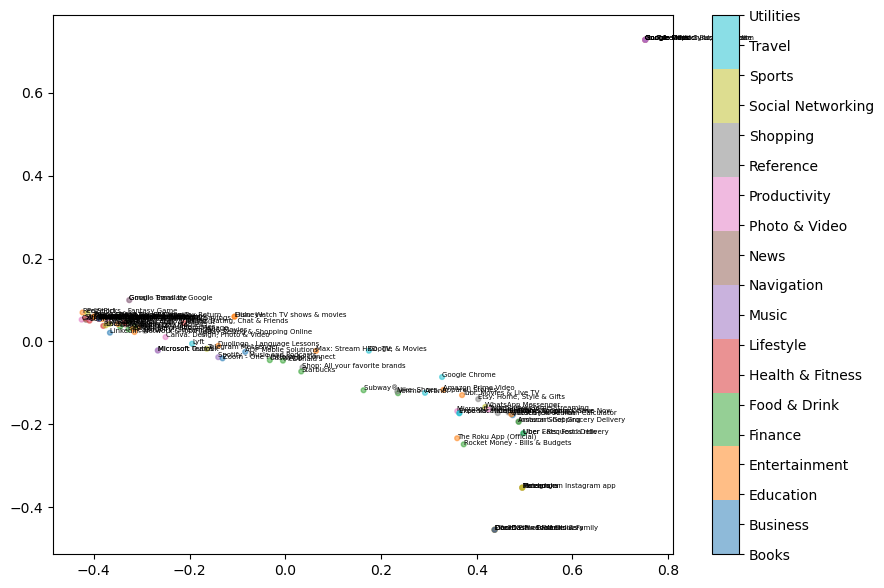

In [81]:
# Step 3: Plot the documents in 2D
plt.figure(figsize=(10, 7))

# Or for t-SNE plot
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='blue')
# for i, doc in enumerate(documents):
#     plt.annotate(doc, (X_tsne[i, 0], X_tsne[i, 1]))

# Using PCA
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color_encoded, cmap=plt.cm.tab10, alpha= 0.5, s = 12)

# Add a color bar to indicate the categories
plt.colorbar(scatter, ticks=range(len(le.classes_)), format=plt.FuncFormatter(lambda x, _: le.inverse_transform([int(x)])[0]))

# for i, doc in enumerate(documents):
#     plt.annotate(f"Doc {i+1}", (X_pca[i, 0], X_pca[i, 1]))
for i, name in enumerate(pp['Name']):
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]), fontsize = 5)


Install mplcursors with "pip install mplcursors": Failed to import 💔 Don't know why

In [5]:
# Add hovering to graph
import mplcursors

cursor = mplcursors.cursor(scatter, hover=True)

@cursor.connect("add")
def on_add(sel):
    sel.annotation.set(text=pp['name'][sel.index])

# Display the graph
plt.title("Privacy Policies of Top 100 Apps")
plt.show()


ModuleNotFoundError: No module named 'mplcursors'

Use plotly for interactive instead

In [6]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    mode='markers',
    text=pp['Name'],  # Set the hover text to the 'name' column
    marker=dict(size=8, color = color_encoded)
))

# Show the plot
fig.show()